# What is Statistical Analysis in Data Science?

This blog starts from defination to explaining and experimenting with different part of statistics.

## Introduction
Statistics is very important field and there are lots of definitions and use cases available and noting few.\
**Statistics is**\
* a systematic collection of data on measurements or observations, often related to demographic information such as population counts, incomes, population counts at different ages, etc. [From Wikipedia.](https://en.wiktionary.org/wiki/statistics)
* the science concerned with developing and studying methods for collecting, analyzing, interpreting and presenting empirical data. [From UCI.](https://www.stat.uci.edu/what-is-statistics/)

Data Science is not a new term in this decade but it was nowhere to be heard before 90s. Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.[From Wikipedia.](https://en.wikipedia.org/wiki/Data_science)

If we carefully look into definition of Data Science above, we can feel that the Statistics seems to be interacting in Processing, extracting and finding actionable insights from the data. But when it comes to the insights, there are lots of approaches and insights are not predefined. The popular term, EDA (Exploratory Data Analysis) is one of earlier steps in finding insights and in that phase, one might try to answer below questions:
* What is the format of the data? Is it structured or unstructured?
* What is the types (categorical, boolean, integer, fractional, text and so on) of columns in the data?
* What is the availability of the data in each columns?
* What is the distribution of the each columns?
* What is the summary (minimum, maximum, mean, spread, Kurtosis and so on) of the data?
* Is there any outliers in the data?
* Is there some pattern on the data?
* Is there any relationship between columns?
* Are all the fields on the single column behaves same while sampling?

The list goes on but the theory and the concepts on the base level are all the same. All of the questions above are answered by the Statistical techniques and in general, one could divide them into two categories:
1. Descriptive Statistics
2. Inferential Statistics

And our main goal in this blog article is to take a small dive into these two category to answer some of questions in EDA. And analysis that are done based on Statistics is statistical analysis.


## Definitions
Descriptive Statistics is all about describing the data in the terms of some numbers, charts, graphs or plots. In descriptive statistics, our focus will be on the summary of the data like mean, spread, quartiles, percentiles and so on.

Where as, in Inferential Statistics, we take a step forward from the descriptive information we had and try to make some inferences or predictions. In general case, we try to prove, estimate and hypothesize something by taking a sample from the population. In inferential statistics, our focus will be on making conclusion about something.


## Data We Are Using
We are using most popular dataset in the Machine Learning world, Titanic dataset.
<!-- The dataset we are going to use is of COVID 19 dataset available on [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data). According to the authors, the data is updated regularly and please remember that, **the result will come different for you than mine**. -->

In [1]:
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
import plotly.io as pio 
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
pio.renderers.default = "colab" # should change by looking into pio.renderers

pd.options.display.max_columns = None


df=pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

We are using:
* `pandas` for data analysis and without it where would we be now.
* `numpy` for possible array operations.
* `plotly` for plotting nice interactive plots.
* `cufflinks` for makking a connection between `pandas` and `plotly`.
* Set some configurations.


## Descriptive Statistical Analysis
If we want to go further into the descriptive analysis, then we will measure:
1. Central tendency which focuses on the average.
2. Variability (measure of dispersion) which focuses on how far the data has spreaded.

We often focus on frequency distribution, quartile/**percentile** of data along with above two kinds.

### Measuring Frequency Distribution
The frequency distribution simply is the number of occurence of certain value and it could be as simple as counting number of age of people. We could choose any but I found this one to be easy to explain.


#### Frequency Distribution of Numerical Data
Lets see the distribution of the age of the passengers.

In [2]:
df.Age.iplot(kind="hist")

In above plot, if we hover over the bar, we could see the number of people of certain age. But plotly is giving us result in some range. Which is not much of a big deal here.

#### Frequency Distribution of Categorical Data
Lets see the frequency distribution of gender.

In [3]:
df.Sex.iplot(kind="hist")

As expected, data is shown in categorical counts.

### Central Tendency
The most common thing we do in this part is find the summary statistics of a data which includes calculating mean, median, range, mode and other percentile values.


#### Mean
What is the average age of the passengers?

We calculate mean using,

$$
\mu = \frac{\sum_{i=0}^{N} x_i}{N} 
$$

In [4]:
df.Age.mean()

29.471443066516347

> Mean age is 29.4 years.

#### Median
What is the mid age of the passengers?

We calculate median using,

$$
\text{median} = \left(\frac{N}{2}\right)^{th} \text{item}
$$

In [5]:
df.Age.median()

28.0

> Median age is 28 years.

#### Mode
What is the mot repeated age?

It is simply the most repeated value.

In [6]:
df.Age.mode()

0    22.0
dtype: float64

Most repeated age seems to be 22.

### Dispersion or Measure of Variability
The dispersion or variability, as the term suggests, is the measure of spreadness of the data. While measuring spread of the data, one might try to find out:
* Range of the data (Min, Max)
* Standard Deviation
* Variance

Lets see them into action.

#### Range of the data

Range means the minimum and maximum of the value.

In [7]:
df.Age.min(), df.Age.max()

(0.42, 80.0)

It seems that the values in the field Age has been spreaded from 0.4 years to 80 years. But this does not give us clear picture of the how deviated a data is from the mean position? So lets find it out on Standard Deviation.

#### Variance
Variance is very important and widely used while measuring the volatility and spread of the data.

For population variance, it is denoted by greek letter sigma square and calculated as,

$$
\sigma^2 = \frac{\displaystyle\sum_{i=1}^{N}(X_i - \mu)^2} {N}
$$

But for sample variance,
$$
s = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} {n-1}
$$

Where,
* s is sample variance,
* n is shape of the sample,
* $x_i$ is $i^{th}$ element of the sample,
* $\bar{x}$ is sample mean




In [8]:
df.Age.var()

199.428297012274

It seems that our data's Age have a huge variance.

#### Standard Deviation
A standard deviation gives us the numerical value which represents the data's location from the mean position. A low standard deviation means that data are around the mean and high standard deviation means data is far from the mean and is more spreaded.

It is a squared root of variance.

For population standard deviation,

$$
\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N}(X_i - \mu)^2} {N}}
$$



In [9]:
df.Age.std()

14.121908405462555

Our standard deviation is also huge. But as we saw above on the frequency distrubution, the data was widely spreaded and so did the range told us.

### Percentiles
I find percentiles to be one of simplest way to calculate the outliers and spreadness on the data. Lets find out the summary of our Age data.

Using pandas, we do not have to manually calculate all these values and we could get it by simply doing `.describe()` on series or dataframe.

In [10]:
df.Age.describe()

count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Looking over above output, we can say that the most density of the data is from age 20 to 38 and this can be well viewed by box plot.

In [11]:
df.Age.iplot(kind="box")

The box plot often gives us how much the data contains the outliers. The bars in the plot represents max, q3, median, q1, min from top to the bottom. Another variant of looking over these density is via dense plot.

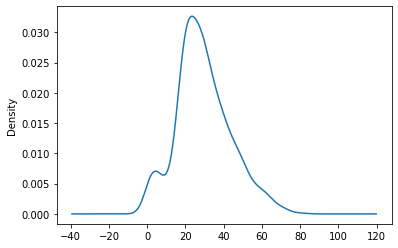

In [12]:
df.Age.plot(kind="kde")

### Univariate vs Multivariate Analysis

Until now we have done univariate analysis and operations but it does not end here. We often combine various columns of the data and view them to find relationship between them. Once we have done uni variate analysis and done required data processing, we could do multi variate analysis. One includes, getting the average age according to the gender.

In [13]:
df.groupby("Sex").Age.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,27.719745,13.834740,0.75,18.0,27.0,36.0,63.0
male,573.0,30.431361,14.197273,0.42,21.0,28.0,38.0,80.0


In above output, we could see that number of female passenger is lower than that of the male and so on.

#### Correlation and Covariance
These both terms are used to find the relationship between two fields and major differences between two are:
* Covariance is a measure of random variables change together. Where as correlation is a measure of how strongly two random variables are related to each other.
* Covariance is a measure of correlation where as correlation is a scaled form of covariance.
* Covariance can vary between -∞ and +∞	where as correlation ranges between -1 and +1.

**Covariance**

$$
\text{cov(X,Y)} = \frac{\sum_{i}^N {(X_i-\mu_x)(Y_i-\mu_y)}}{N}
$$

**Correlation**

$$
\rho(X,Y) = \frac{\sigma_{XY}}{\sigma_X \sigma_Y} 
$$


In [14]:
# lets give numerical value to gender, say male as 1 female as 0
df["gender"] = 0
df.loc[df.Sex=='male', "gender"]=1
df.corr().iplot(kind="heatmap")

Looking over the heatmap above, we can conclude that, 
* positive correlation between Age and Fare,
* positive correlation between Fare and Siblings/Spouses Aboard
* positive correlation between Fare and Parents/Children Aboard
* And also some relationship with gender and Survived but we can not claim it because gender is binary variable.

## Inferential Statistical Analysis

While Descriptive Analysis was more about EDA, Inferential Analysis is taking a step further and make predictions, assumptions and conclusions out of the data. This is quite larger area than the descriptive and it does require another blog for the proper explanation but I am trying to include it as much as possible.

In all of the inferential analysis there there are mainly two things we do:
* Making inferences or predictions about the population. Example,the average age of the passengers is 29 years. 
* Making and testing hypothesis about the populations. Example, whether the survival rate of one gender differs from another's. 

### Sampling
One of popular thing we do in inferential statistics in sampling. And sampling is done when there is large population. The assumption is that if the distribution of sample is identical to the population then we could make assumptions about the population based on the sample's test. Nearly similar thing is often done in Machine Learning world. *For example, we first train a data with training set and validate it with our validation sets. Then we assume that the data was trained and tested on the data that was identical to the real data that will make prediction on.*

While working with a sample two terms are used to represent sample and population metrics:
* **Statistics**: It is a measure or metric of sample. e.g. smaple age.
* **Parameter**: It is a measure or metric of a population. e.g. population age.


#### Problems with Sampling
* Sample simply means to draw out the subset of the data from the population and whose size should always be smaller than that of the population. One major problem could be found in sampling is that the mean and variance of sample might not ressemble the population. It is often called as sample error.


### Estimation
While working with prediction/hypothesis in inferential analysis, we often have to deal with two types of estimates:
* **Point Estimation**: It is simply a single value estimation for example the sample mean age is equal to the population mean age.
* **Interval Estimation**: This estimation is based on finding a value in some range. For example the confidence interval is used in tests like Chi Square, t-test etc. In above example of Titanic dataset we could make an estimation like, the difference between sample mean age and population mean age is not more than 5%.

### Test
There are lots of test based upon the nature of estimation, calculation and prediction but all of those can be divided into 3 categories:
* Comparison Test
* Correlation Test
* Regression Test

Based on parameters, we can also categorize tests into two groups:
* **Parametric Test**: Parametric tests are those in which we work with parameters like mean and variance. One example of this test is t-test.
* **Non Parametric Test**: These tests are non parametric because does not use parameters in the hypothesis. One example is Mann Whitney U test.

Based on the measurement (Nominal, Ordinal, Interval and Ratio) of the data we can choose bset test for our data. 



### Terms Widely Used in Testing
* **Confidence Interval**: Confidence interval is all about giving some room for the error. Which is often used with tests. For example, if we are trying to make a test where we have set our hypothesis that the average mean of sample lies within the range 25 to 35 then asume that our sample mean was calculated to be 28 while population mean is 30. Then we will still be selecting the sample mean.  
* **Confidence Level**: It sounds similar to confidence interval but no it is not. But these two terms are related to each other. Confidence level tells us how much probability is there that the sample statistics or estimated parameter lies within the confidence interval. For example, if we set the confidence level to 5%, then we will be claiming that if there are 100 tests done, at max 5 will be predicting wrong prediction. Or in other words, out of 100 tests, 95 tests will have the estimated value lie within the confidence interval.
* **Hypothesis**: As the term suggests, hypothesis is something that we are assuming to happen. In Hypothesis testing, we will have different hypothesis against the default or null hypothesis. Those hypothesis against the default are known as alternative hypothesis.



### Comparison Test
Comparision test compares the parameters like mean, variance and median. 

Test|Parametric|Comparison With|No. Samples|
----|----|----|-----|
t-test|Yes|Mean, Variance|2|
ANOVA|Yes|Variance, Mean|3+|
Mann-Whitney U (Wilcoxon Rank Sum)|No|Sum of rankings|2|
Wilcoxon Signed Rank|	No|	Distributions|2|
Kruskal-Wallis H|	No|	Mean Rankings|	3+|
Mood’s Median|	No|	Medians|	2+|




#### Student's t-test
This test is done in order to determine whether there is significant difference between means of two groups, mostly between sample and population. There are different variations of t-test.

"The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis."
- [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)

It is named as Student's test because this test was developed by the student of William Gosset.

In this test, the means from two samples are checked if they are significantly different from each other. The significant difference is calculated by finding the standard error in the mean. The t statistic calculated by the test is compared with the critical values from the [t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution). The critical values is calculated using degree of freedom and significance level (generally 5%) with percent point function (PPF).

T test is very useful in the case when we need to know whether a statistic is smaller or greater than another. In this case, test becomes two tailed test. Besides from two tailed test, we could do right tailed or left tailed test too. In comparison test, we have

* Null Hypothesis: Two statistics are equal.
* Alternative Hypothesis: Two statistics are not equal.

We can test the statistics in two ways either using t-statics and critical value or alpha (significance level) and cumulative probability (p).

* If abs(t-statistic)<=critical value: 
  * Unable to reject null hypothesis.
* Else: 
  * Reject null hypothesis.

* If p>alpha: 
  * Unable to reject null hypothesis.
* Else:
  * Reject null hypothesis.

There are two main versions of Student’s t-test:

* **Independent Samples**: The case where the two samples are unrelated.
* **Dependent Samples**: The case where the samples are related, such as repeated measures on the same population. Also called a paired test.

To make this blog as small as possible, we will do only one example and that is of Independent Samples. We will take two samples from above data and compare if average age of each sample varies or not.

$$
t = \frac{\bar{x_1}-\bar{x_2}}{s_p \sqrt{\frac{2}{n}}} \\\
Where, s_p \text{is a standard error (deviation).} \\\
s_p = \sqrt{\frac{SE^2_1+SE^2_2}{2}} \\\ and \\\
SE = \frac{\text{standard deviation}}{\sqrt{n}} 
$$

But we won't do any of these calculation from scratch, we will use SciPy.

In [26]:
from scipy.stats import ttest_ind,t


# take sample of Age
sample1 = df.Age.sample(500)
sample2 = df.Age.sample(500)

print(f"Means of each sample is: {sample1.mean(), sample2.mean()}")
alpha = 0.05

stat, p = ttest_ind(sample1, sample2)

# degrees of freedom
dof = len(sample1) + len(sample2) - 2
# calculate the critical value
cv = t.ppf(1.0 - alpha, dof)

print('t=%.3f, p=%.3f' % (stat, p))

print(f"Comparing statistics with alpha={alpha}, Critical Value={cv}, p={p}, t-stat={stat}.")

print("\nUsing t-stat.")
if abs(stat) <= cv:
	print('Unable to reject the null hypothesis.')
else:
	print('Reject the null hypothesis that the means are equal.')
 
print("\nUsing p value.")
if p > alpha:
	print('Unable to reject the null hypothesis.')
else:
	print('Reject the null hypothesis that the means are equal.')

Means of each sample is: (29.6095, 29.06434)
t=0.614, p=0.540
Comparing statistics with alpha=0.05, Critical Value=1.6463818766348755, p=0.5396670298167929, t-stat=0.6135280743226035.

Using t-stat.
Unable to reject the null hypothesis.

Using p value.
Unable to reject the null hypothesis.


Above example is just a simple example and unable to reject a hypothesis does not means you accept a null hypothesis.

#### ANOVA Test
ANOVA means Analysis of Variance. This test is used when we have to compare statistics between two or more samples. If we have two sample, we will use t-test.

Lets compare average age of each Pclass and check if there is difference in average age based on passenger class.

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

tdf = df.groupby("Pclass").Age.mean().rename("mage").reset_index()
 
model = ols('mage' + '~' + "Pclass", data = tdf).fit() #Oridnary least square method
result_anova = sm.stats.anova_lm(model) # ANOVA Test
print(result_anova)


           df     sum_sq    mean_sq          F    PR(>F)
Pclass    1.0  92.483183  92.483183  30.859642  0.113386
Residual  1.0   2.996897   2.996897        NaN       NaN


Looking on the first row of above result's p-value, we were unable to reject the null hypothesis.

### Correlation Tests
Correlation tests are done to calculate the strength of the association between data. 

Test|	Parametric|	Data Type|
---|---|---|
Pearson’s r|	Yes|	Interval/Ratio
Spearman’s r|	No|	Ordinal/Interval/Ratio
Chi Square Test of Independence|No|	Nominal/Ordinal

Pearson's r test is statistically powerful than Spearman's but Spearman's test is appropriate for interval and ratio type of data.

Only Chi Square Test of Independence is the only test that can be used with nominal variables.



#### Pearson's r Test
The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

A formula is:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/0a96c914bb811b84698b4d4118794cf4c8167ca7)
*From Wikipedia*

Lets compare whethere there is any relationship between fare and the age of passenger.

$$
\rho_{X,Y} = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}
$$

In [41]:
df.Fare.corr(df.Age)

0.11232863699941618

It states that there is some positive correlation.

#### Spearman’s Correlation: Non-Linear Relationship between two variables.
Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables. In this case Spearman's correlation is used.

Pearson correlation assumes the data is normally distributed. However, Spearman does not make any assumption on the distribution of the data. That is the main difference between these two.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ee94267b983c2f16be1d3c61556e264762d5cba9)
*From Wikipedia*

In [40]:
df.Fare.corr(df.Age, method="spearman")

0.15606180426955454

#### Chi-Square Test: Does Survived depends on Gender?
**[When to use Chi Square?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/)**

The Chi-square test is a non-parametric statistic, also called a distribution free test. Non-parametric tests should be used when any one of the following conditions pertains to the data:

* The level of measurement of all the variables is nominal or ordinal.
* The sample sizes of the study groups are unequal; for the χ2 the groups may be of equal size or unequal size whereas some parametric tests require groups of equal or approximately equal size.
* The original data were measured at an interval or ratio level, but violate one of the following assumptions of a parametric test:
    * The distribution of the data was seriously skewed or kurtotic (parametric tests assume approximately normal distribution of the dependent variable), and thus the researcher must use a distribution free statistic rather than a parametric statistic.
    * The data violate the assumptions of equal variance or homoscedasticity.
    * For any of a number of reasons (1), the continuous data were collapsed into a small number of categories, and thus the data are no longer interval or ratio.
    
**Note:**

* **Null Hypothesis(H0):** Two variables are not dependent. (no association between the two variables)
* **Alternate Hypothesis(H1):** There is relationship between variables. 


* If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

> Chi-Square test works in our case by converting our data into categorical form like below.

|Gender/Survived|1|0|
| :- |-------------: | :-:
|1|a|b|
|0|c|d|

In [42]:
# make a contingency table
cdf = pd.crosstab(df['Sex'],
                            df['Survived'],
                           margins=True, margins_name="Total")
cdf

Survived,0,1,Total
Sex,,,
female,81,233,314
male,464,109,573
Total,545,342,887


In [44]:
from scipy import stats

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = df['Sex'].unique()
columns = df['Survived'].unique()
for i in columns:
    for j in rows:
        O = cdf[i][j]
        E = cdf[i]['Total'] * cdf['Total'][j] / cdf['Total']['Total']
        chi_square += (O-E)**2/E
        
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 260.71530379938315  and p value is: 0.0
Null Hypothesis is rejected.


Since we were able to reject the null hypothesis, we can conclude that, there is some relationship between Sex and Survival of the person.

##### Readings
* https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

#### McNemar's Test: Test if sending SMS had any effects(before vs after).
This test works for binary data which includes cases like pass/fail, and in our case converted/not-converted.

* We will assume that the cross selling technique will increase the rate of conversion, but we have to prove it statistically.
* We will measure the rate of conversion before the implemenatation and after the implementation of our campaign. If the person took any service, his/her conversion value will be 1 else 0.
* A contingency table will be something like below.

|After/Before SMS|converted  | not-converted|
| :- |-------------: | :-:
|converted| a|b|
|not-converted|c|d|

##### Assumptions
* H0: There is no difference in conversion. i.e. sending sms had no effect on conversion.
* H1: There is significant difference in conversion. i.e. sending sms had significant effect on conversion.

* p > alpha: fail to reject H0, no difference in the disagreement (e.g. sending sms had no effect).
* p <= alpha: reject H0, significant difference in the disagreement (e.g. sending sms had an effect).

##### Readings
* https://machinelearningmastery.com/mcnemars-test-for-machine-learning/
* https://www.statology.org/mcnemars-test-python/
* https://en.wikipedia.org/wiki/McNemar%27s_test
* https://www.scribbr.com/statistics/statistical-tests/


### Regression Tests
Regression tests are done where we try to estimate some parameter. If we have one dependent and one independent variable then we will be using simple linear regression like $y=mx+c$. If we have multiple variables then it will be mulilinear regression. But besides linear, there is logistic regression which tries to classify between two class. 

The regression test examines whether the change is dependent variable have any effect in the independent variable or not.

Test|	Predictor|	Outcome |
----|-----|-----|
Simple Linear|	1 interval/ratio|	1 interval/ratio|
Multi Linear|	2+ interval/ratio	|1 interval/ratio|
Logistic regression	|1+ |	1 binary|
Nominal regression	|1+ |	1 nominal|
Ordinal regression	|1+ |	1 ordinal|

### Problems in Tests
## Errors
* A Type I error, also called a false positive, is when we accept a hypothesis that is actually false; that is, we consider an effect significant when it was actually due to chance.
* A Type II error, also called a false negative, is when we reject a hypothesis that is actually true; that is, we attribute an effect to chance when it was actually real.

We can decrease the chance of a false positive by decreasing the threshold. For example, if the threshold is 1%, there is only a 1% chance of a false positive.

But there is a price to pay: decreasing the threshold raises the standard of evidence, which increases the chance of rejecting a valid hypothesis. In general there is a tradeoff between Type I and Type II errors. The only way to decrease both at the same time is to increase the sample size (or, in some cases, decrease measurement error).

### Takeways From Tests

1. How to find the relationship between two variables when dependent variable is in binary format?
    * Chi-Square test will work if we convert our data into categorical format. i.e. make binary data into 2 categories 1 and 0.
2. How to handle the false test result. i.e. our statistics failed.
3. How to make an assumption that one population is better than another population?
    * Two Sample t-test can be used. First find if the mean of two populations are different and if it is, find difference.
4. Which test should be best when the number of examples is different for each samples?
    * Chi-Square test should work fine but data counts should be more than 5. Else use Fisher's Exact Test is an alternative to a chi-square test.

## References
* https://www.scribbr.com/statistics/levels-of-measurement/
* https://studyonline.unsw.edu.au/blog/types-of-data
* https://www.scribbr.com/statistics/inferential-statistics/
* https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/